In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('committee_data.csv')

df = pd.DataFrame(data)
# Display basic information about the dataset
print("Initial Data:")
print(df.info())
print(df.head())

Initial Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   committee_id   5000 non-null   float64
 1   no_of_members  5000 non-null   float64
 2   no_of_posts    5000 non-null   float64
 3   no_of_events   5000 non-null   float64
 4   followers      5000 non-null   float64
 5   tags           5002 non-null   object 
dtypes: float64(5), object(1)
memory usage: 234.6+ KB
None
   committee_id  no_of_members  no_of_posts  no_of_events  followers  \
0           1.0           61.0         59.0          16.0        9.1   
1           2.0           24.0         15.0           6.0        9.3   
2           3.0           81.0         32.0          22.0        9.4   
3           4.0           70.0         50.0          11.0        3.4   
4           5.0           30.0         36.0          21.0        4.6   

                          tags  
0  

In [12]:

# --- Data Cleaning ---

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# If missing values exist, we can decide to fill them or drop them.
# For this demo, let's assume there are no missing values.
# df.fillna(method='ffill', inplace=True)

# Remove duplicate records if any
df.drop_duplicates(inplace=True)

df= df.dropna()

# -------------------------------
# 2. Feature Engineering and Preprocessing
# -------------------------------

# Assume no_of_posts and no_of_events are monthly totals. 
# Create weekly rates by dividing by 4 (approximation).
df['weekly_post_rate'] = df['no_of_posts'] / 4
df['weekly_event_rate'] = df['no_of_events'] / 4

# Optional: Standardize features (except committee_id) if needed for modeling.
features_to_scale = ['no_of_members', 'no_of_posts', 'no_of_events', 
                     'followers', 'weekly_post_rate', 'weekly_event_rate']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])



Missing Values:
committee_id     2
no_of_members    2
no_of_posts      2
no_of_events     2
followers        2
tags             0
dtype: int64


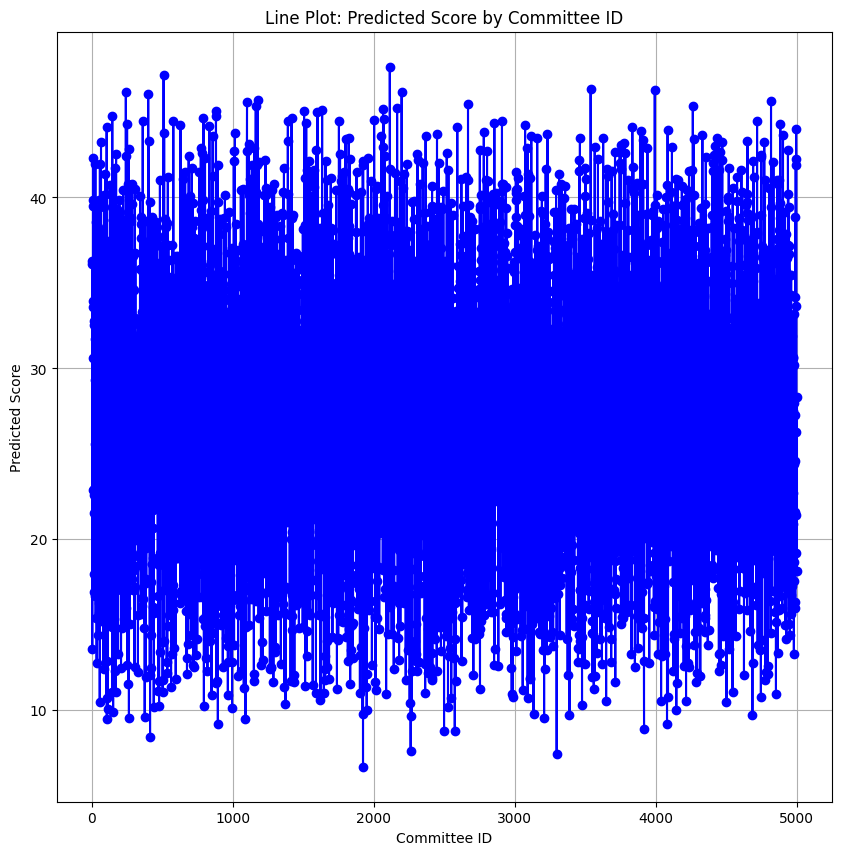

/tmp/ipykernel_5504/673251045.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='committee_id', y='predicted_score', data=df, palette='viridis')


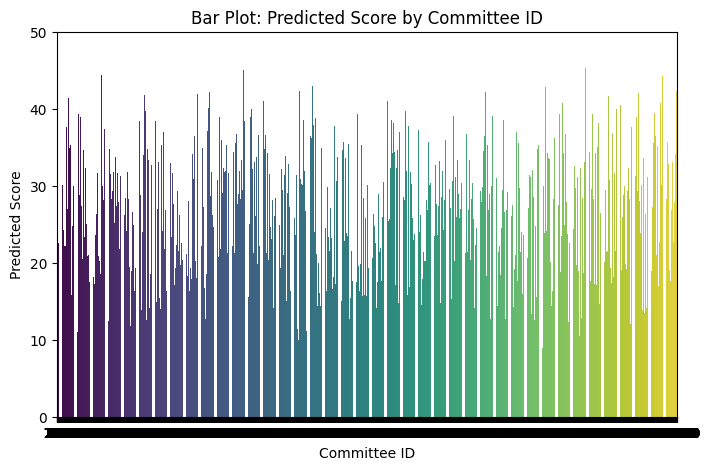

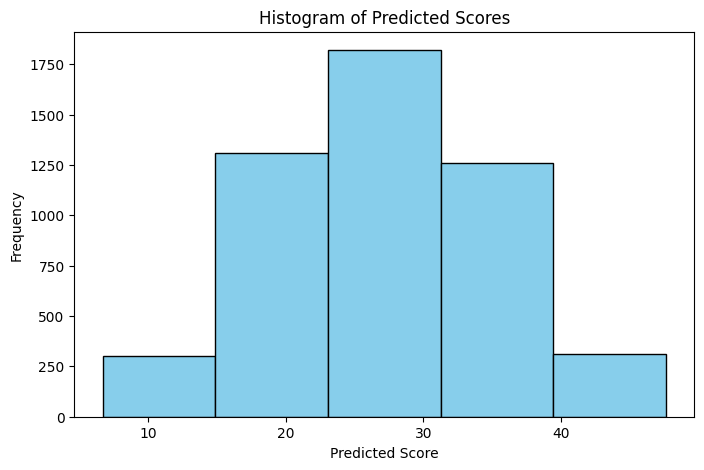

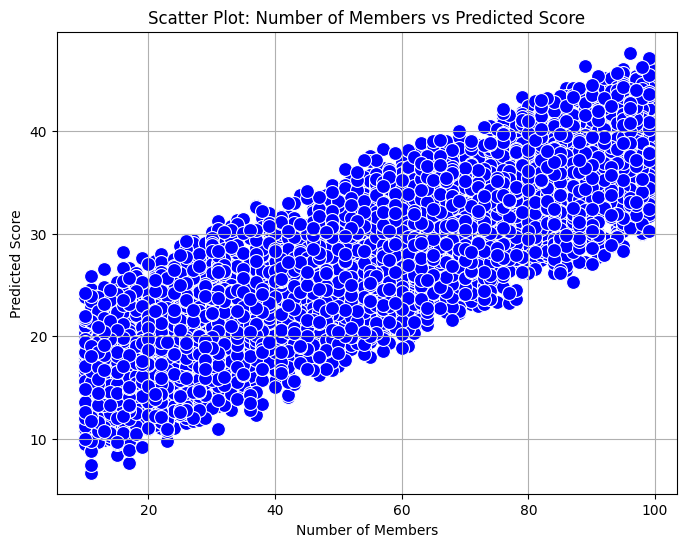

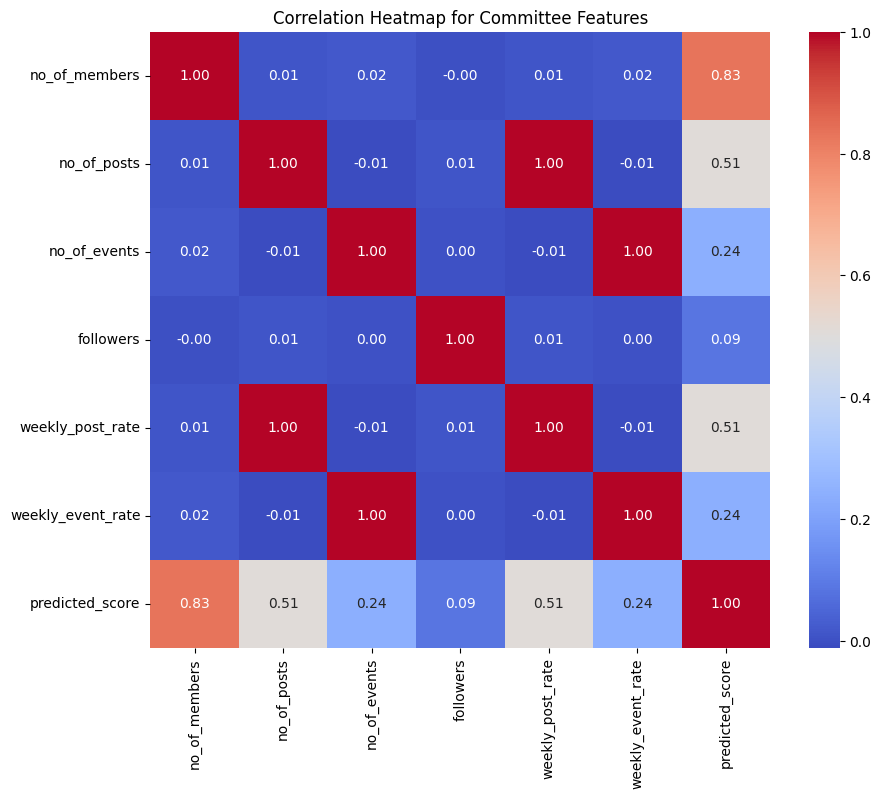

In [13]:
weights = {
    'no_of_members': 0.25,
    'no_of_posts': 0.25,
    'no_of_events': 0.25,
    'followers': 0.25
}

df['composite_score'] = (
    df['no_of_members'] * weights['no_of_members'] +
    df['no_of_posts']   * weights['no_of_posts'] +
    df['no_of_events']  * weights['no_of_events'] +
    df['followers']     * weights['followers']
)

# For this example, we'll treat composite_score as our predicted score.
df['predicted_score'] = df['composite_score']

# -------------------------------
# 3. Data Visualization
# -------------------------------

# --- A. Line Plot ---
# Plot committee IDs (x-axis) versus predicted score (y-axis) as a line plot.
plt.figure(figsize=(10, 10))
plt.plot(df['committee_id'], df['predicted_score'], marker='o', linestyle='-', color='b')
plt.title("Line Plot: Predicted Score by Committee ID")
plt.xlabel("Committee ID")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# --- B. Bar Plot ---
# Create a bar plot to compare predicted scores across different committees.
plt.figure(figsize=(8, 5))
sns.barplot(x='committee_id', y='predicted_score', data=df, palette='viridis')
plt.title("Bar Plot: Predicted Score by Committee ID")
plt.xlabel("Committee ID")
plt.ylabel("Predicted Score")
plt.show()

# --- C. Histogram ---
# Plot a histogram to visualize the distribution of predicted scores.
plt.figure(figsize=(8, 5))
plt.hist(df['predicted_score'], bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram of Predicted Scores")
plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.show()


# -------------------------------
# 3. Scatter Plot
# -------------------------------
# Visualize the relationship between the number of members and the predicted score.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='no_of_members', y='predicted_score', data=df, s=100, color='blue', marker='o')
plt.title("Scatter Plot: Number of Members vs Predicted Score")
plt.xlabel("Number of Members")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# -------------------------------
# 4. Heatmap
# -------------------------------
# Compute a correlation matrix for all numeric features including the newly created ones.
numeric_features = ['no_of_members', 'no_of_posts', 'no_of_events', 
                    'followers', 'weekly_post_rate', 'weekly_event_rate', 'predicted_score']
corr_matrix = df[numeric_features].corr()

# Plot the heatmap of the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Committee Features")
plt.show()






















# # Plot histograms for each numeric feature
# df.hist(bins=10, figsize=(12, 8))
# plt.suptitle("Feature Distributions")
# plt.show()

# # Plot a correlation heatmap
# plt.figure(figsize=(10, 6))
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap="coolwarm")
# plt.title("Correlation Matrix")
# plt.show()

# # Scatter plots: examine relationships between features and a composite target (if available)
# # For demonstration, we create a temporary target as a weighted sum.
# weights_demo = {
#     'no_of_members': 0.20,
#     'no_of_posts': 0.20,
#     'no_of_events': 0.20,
#     'followers': 0.20,
#     'weekly_post_rate': 0.10,
#     'weekly_event_rate': 0.10
# }

# df['target'] = (
#     df['no_of_members']    * weights_demo['no_of_members'] +
#     df['no_of_posts']      * weights_demo['no_of_posts'] +
#     df['no_of_events']     * weights_demo['no_of_events'] +
#     df['followers']        * weights_demo['followers'] +
#     df['weekly_post_rate'] * weights_demo['weekly_post_rate'] +
#     df['weekly_event_rate']* weights_demo['weekly_event_rate']
# )

# # Create scatter plots between each feature and the target
# features = ['no_of_members', 'no_of_posts', 'no_of_events', 
#             'followers', 'weekly_post_rate', 'weekly_event_rate']

# fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# axs = axs.flatten()

# for idx, feature in enumerate(features):
#     sns.scatterplot(x=df[feature], y=df['target'], ax=axs[idx])
#     axs[idx].set_title(f"{feature} vs Target")

# plt.tight_layout()
# plt.show()


In [14]:

# -------------------------------
# 4. Regression Modeling: Predict and Rank Committees
# -------------------------------

# Define features for regression (using the original non-scaled values for simplicity)
feature_cols = [
    'no_of_members', 
    'no_of_posts', 
    'no_of_events', 
    'followers', 
    'weekly_post_rate', 
    'weekly_event_rate'
]
X = df[feature_cols]
y = df['target']

# Split data into training and testing sets (using a small test set here)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error on Test Data:", mse)

# Predict performance scores for all committees
df['predicted_score'] = model.predict(X)

# Rank committees based on predicted performance score (highest first)
df_ranked = df.sort_values('predicted_score', ascending=False)
print("\nCommittee Rankings based on Predicted Performance Score:")
print(df_ranked[['committee_id', 'predicted_score']])

KeyError: 'target'

In [15]:
# Write code for recommending based on tags
# Current tags are sports,literature,science
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity



def recommend_committees(user_tags, committees_df):
    """
    Recommend committees based on tag similarity.
    
    Parameters:
        user_tags (str): A string of tags representing the user's interests.
        committees_df (pd.DataFrame): DataFrame containing committee data with a 'tags' column.
    
    Returns:
        pd.DataFrame: The committees DataFrame with an added similarity_score column,
                      sorted by similarity_score in descending order.
    """
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()
    
    # Fit the vectorizer on the committee tags and transform them into vectors
    committee_vectors = vectorizer.fit_transform(committees_df['tags'])
    
    # Transform the user's tags into a vector using the same vectorizer
    user_vector = vectorizer.transform([user_tags])
    
    # Compute cosine similarity between the user vector and each committee vector
    cosine_similarities = cosine_similarity(user_vector, committee_vectors).flatten()
    
    # Add the similarity score to the DataFrame
    committees_df["similarity_score"] = cosine_similarities
    
    # Sort the committees by similarity score in descending order
    recommendations = committees_df.sort_values("similarity_score", ascending=False)
    
    return recommendations



user_tags = "sports scie"
    
# Get recommendations based on tag similarity
recommendations = recommend_committees(user_tags, df)

print(recommendations[["committee_id", "tags", "similarity_score"]])

      committee_id        tags  similarity_score
0              1.0      sports               1.0
4944        4945.0      sports               1.0
4958        4959.0      sports               1.0
4951        4952.0      sports               1.0
4983        4984.0      sports               1.0
...            ...         ...               ...
1237        1238.0  literature               0.0
1239        1240.0     science               0.0
1224        1225.0     science               0.0
2985        2986.0  literature               0.0
1243        1244.0     science               0.0

[5000 rows x 3 columns]


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_committees_tfidf(user_tags, committees_df):
    """
    Recommend committees based on tag similarity using TF-IDF.
    
    Parameters:
        user_tags (str): A string of tags representing the user's interests.
        committees_df (pd.DataFrame): DataFrame containing committee data with a 'tags' column.
    
    Returns:
        pd.DataFrame: The committees DataFrame with an added similarity_score column,
                      sorted by similarity_score in descending order.
    """
    # Initialize the TfidfVectorizer
    vectorizer = TfidfVectorizer()
    
    # Fit the vectorizer on the committee tags and transform them into vectors
    committee_vectors = vectorizer.fit_transform(committees_df['tags'])
    
    # Transform the user's tags into a vector using the same vectorizer
    user_vector = vectorizer.transform([user_tags])
    
    # Compute cosine similarity between the user vector and each committee vector
    cosine_similarities = cosine_similarity(user_vector, committee_vectors).flatten()
    
    # Add the similarity score to the DataFrame
    committees_df["similarity_score"] = cosine_similarities
    
    # Sort the committees by similarity score in descending order
    recommendations = committees_df.sort_values("similarity_score", ascending=False)
    
    return recommendations


committees_df = pd.DataFrame(data)
    
# Define the user's preferred tags (this can be dynamically set in practice)
user_tags = "sports scie"

# Get recommendations based on tag similarity using TF-IDF
recommendations = recommend_committees_tfidf(user_tags, df)

# Display the recommended committees
print("Recommended Committees based on Tag Similarity using TF-IDF:")
print(recommendations[["committee_id", "tags", "similarity_score"]])


Recommended Committees based on Tag Similarity using TF-IDF:
      committee_id        tags  similarity_score
0              1.0      sports               1.0
4958        4959.0      sports               1.0
4983        4984.0      sports               1.0
4951        4952.0      sports               1.0
4987        4988.0      sports               1.0
...            ...         ...               ...
3003        3004.0  literature               0.0
3004        3005.0     science               0.0
2952        2953.0     science               0.0
2953        2954.0     science               0.0
2996        2997.0     science               0.0

[5000 rows x 3 columns]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_committees_count(user_tags, committees_df):
    """
    Generate recommendations using CountVectorizer.
    """
    vectorizer = CountVectorizer()
    committee_vectors = vectorizer.fit_transform(committees_df['tags'])
    user_vector = vectorizer.transform([user_tags])
    cosine_similarities = cosine_similarity(user_vector, committee_vectors).flatten()
    committees_df["similarity_score"] = cosine_similarities
    recommendations = committees_df.sort_values("similarity_score", ascending=False)
    return recommendations

def recommend_committees_tfidf(user_tags, committees_df):
    """
    Generate recommendations using TfidfVectorizer.
    """
    vectorizer = TfidfVectorizer()
    committee_vectors = vectorizer.fit_transform(committees_df['tags'])
    user_vector = vectorizer.transform([user_tags])
    cosine_similarities = cosine_similarity(user_vector, committee_vectors).flatten()
    committees_df["similarity_score"] = cosine_similarities
    recommendations = committees_df.sort_values("similarity_score", ascending=False)
    return recommendations

def precision_at_k(recommendation_df, true_ids, k):
    """
    Computes precision@k:
    - recommendation_df: DataFrame with recommendations sorted by relevance.
    - true_ids: List of committee_ids that are considered relevant (ground truth).
    - k: Number of top recommendations to consider.
    """
    top_k_ids = recommendation_df['committee_id'].head(k).tolist()
    relevant = len(set(top_k_ids).intersection(set(true_ids)))
    return relevant / k

def main():
    
    # Define the user's preferred tags
    user_tags = "sports science"
    
    # Simulated ground truth: committees the user actually engaged with or liked
    # (In practice, this comes from user interaction data)
    ground_truth = [1,4,40,49,51]

    
    # Generate recommendations using CountVectorizer
    recommendations_count = recommend_committees_count(user_tags, df.copy())
    precision_count = precision_at_k(recommendations_count, ground_truth, k=2)
    
    # Generate recommendations using TF-IDF
    recommendations_tfidf = recommend_committees_tfidf(user_tags, df.copy())
    precision_tfidf = precision_at_k(recommendations_tfidf, ground_truth, k=2)
    
    # Display recommendations and evaluation results
    print("Recommendations using CountVectorizer:")
    print(recommendations_count[['committee_id', 'tags', 'similarity_score']])
    print("Precision@2:", precision_count)
    
    print("\nRecommendations using TF-IDF:")
    print(recommendations_tfidf[['committee_id', 'tags', 'similarity_score']])
    print("Precision@2:", precision_tfidf)

if __name__ == '__main__':
    main()

Recommendations using CountVectorizer:
      committee_id             tags  similarity_score
51            52.0  sports, science               1.0
49            50.0  sports, science               1.0
59            60.0  sports, science               1.0
17            18.0  sports, science               1.0
21            22.0  sports, science               1.0
...            ...              ...               ...
3087        3088.0       literature               0.0
3090        3091.0       literature               0.0
3092        3093.0       literature               0.0
3015        3016.0       literature               0.0
72            73.0       literature               0.0

[5000 rows x 3 columns]
Precision@2: 0.0

Recommendations using TF-IDF:
      committee_id             tags  similarity_score
51            52.0  sports, science               1.0
49            50.0  sports, science               1.0
59            60.0  sports, science               1.0
17            18.0  spor